# Heart Disease Prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info() ## Correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()  ## No null values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(302, 14)

## EDA (Exploratory Data Analysis)

### Target imbalance check

Text(0.5, 1.0, 'Target Imbalance Check (Data is Balanced)')

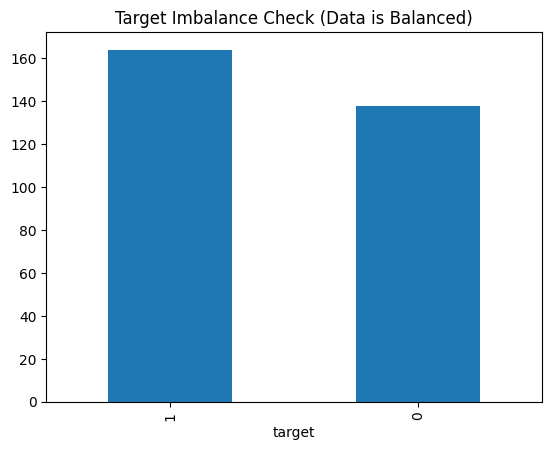

In [ ]:
df["target"].value_counts().plot(kind="bar")  ## Data is Balanced
plt.title("Target Imbalance Check (Data is Balanced)")

## Knowing about each variables

- age : Age in years : Continuous
- sex	: 1 = male, 0 = female :	Binary
- cp : Chest pain type (0–3) : Categorical
- trestbps	: Resting blood pressure	: Continuous
- chol	: Serum cholesterol	: Continuous
- fbs	: Fasting blood sugar >120	: Binary
- restecg	: Resting ECG results	: Categorical
- thalach	: Max heart rate achieved	: Continuous
- exang	: Exercise-induced angina	: Binary
- oldpeak	: ST depression	: Continuous
- slope	: ST segment slope	: Ordinal
- ca	: Major vessels colored :	Discrete
- thal	: Thalassemia :	Categorical
- target	: Heart disease (1/0)	: Binary

**Important note**: Don't one-hot encode on whole data, **Slope** variable is **Ordinal**.

## Univariate Analysis per feature

In [ ]:
non_cat_col=['age', 'trestbps', 'chol',  'thalach',
        'oldpeak']
cat_col=['sex', 'cp','fbs','restecg', 'exang','slope','ca','thal','target']

## Continuos Features

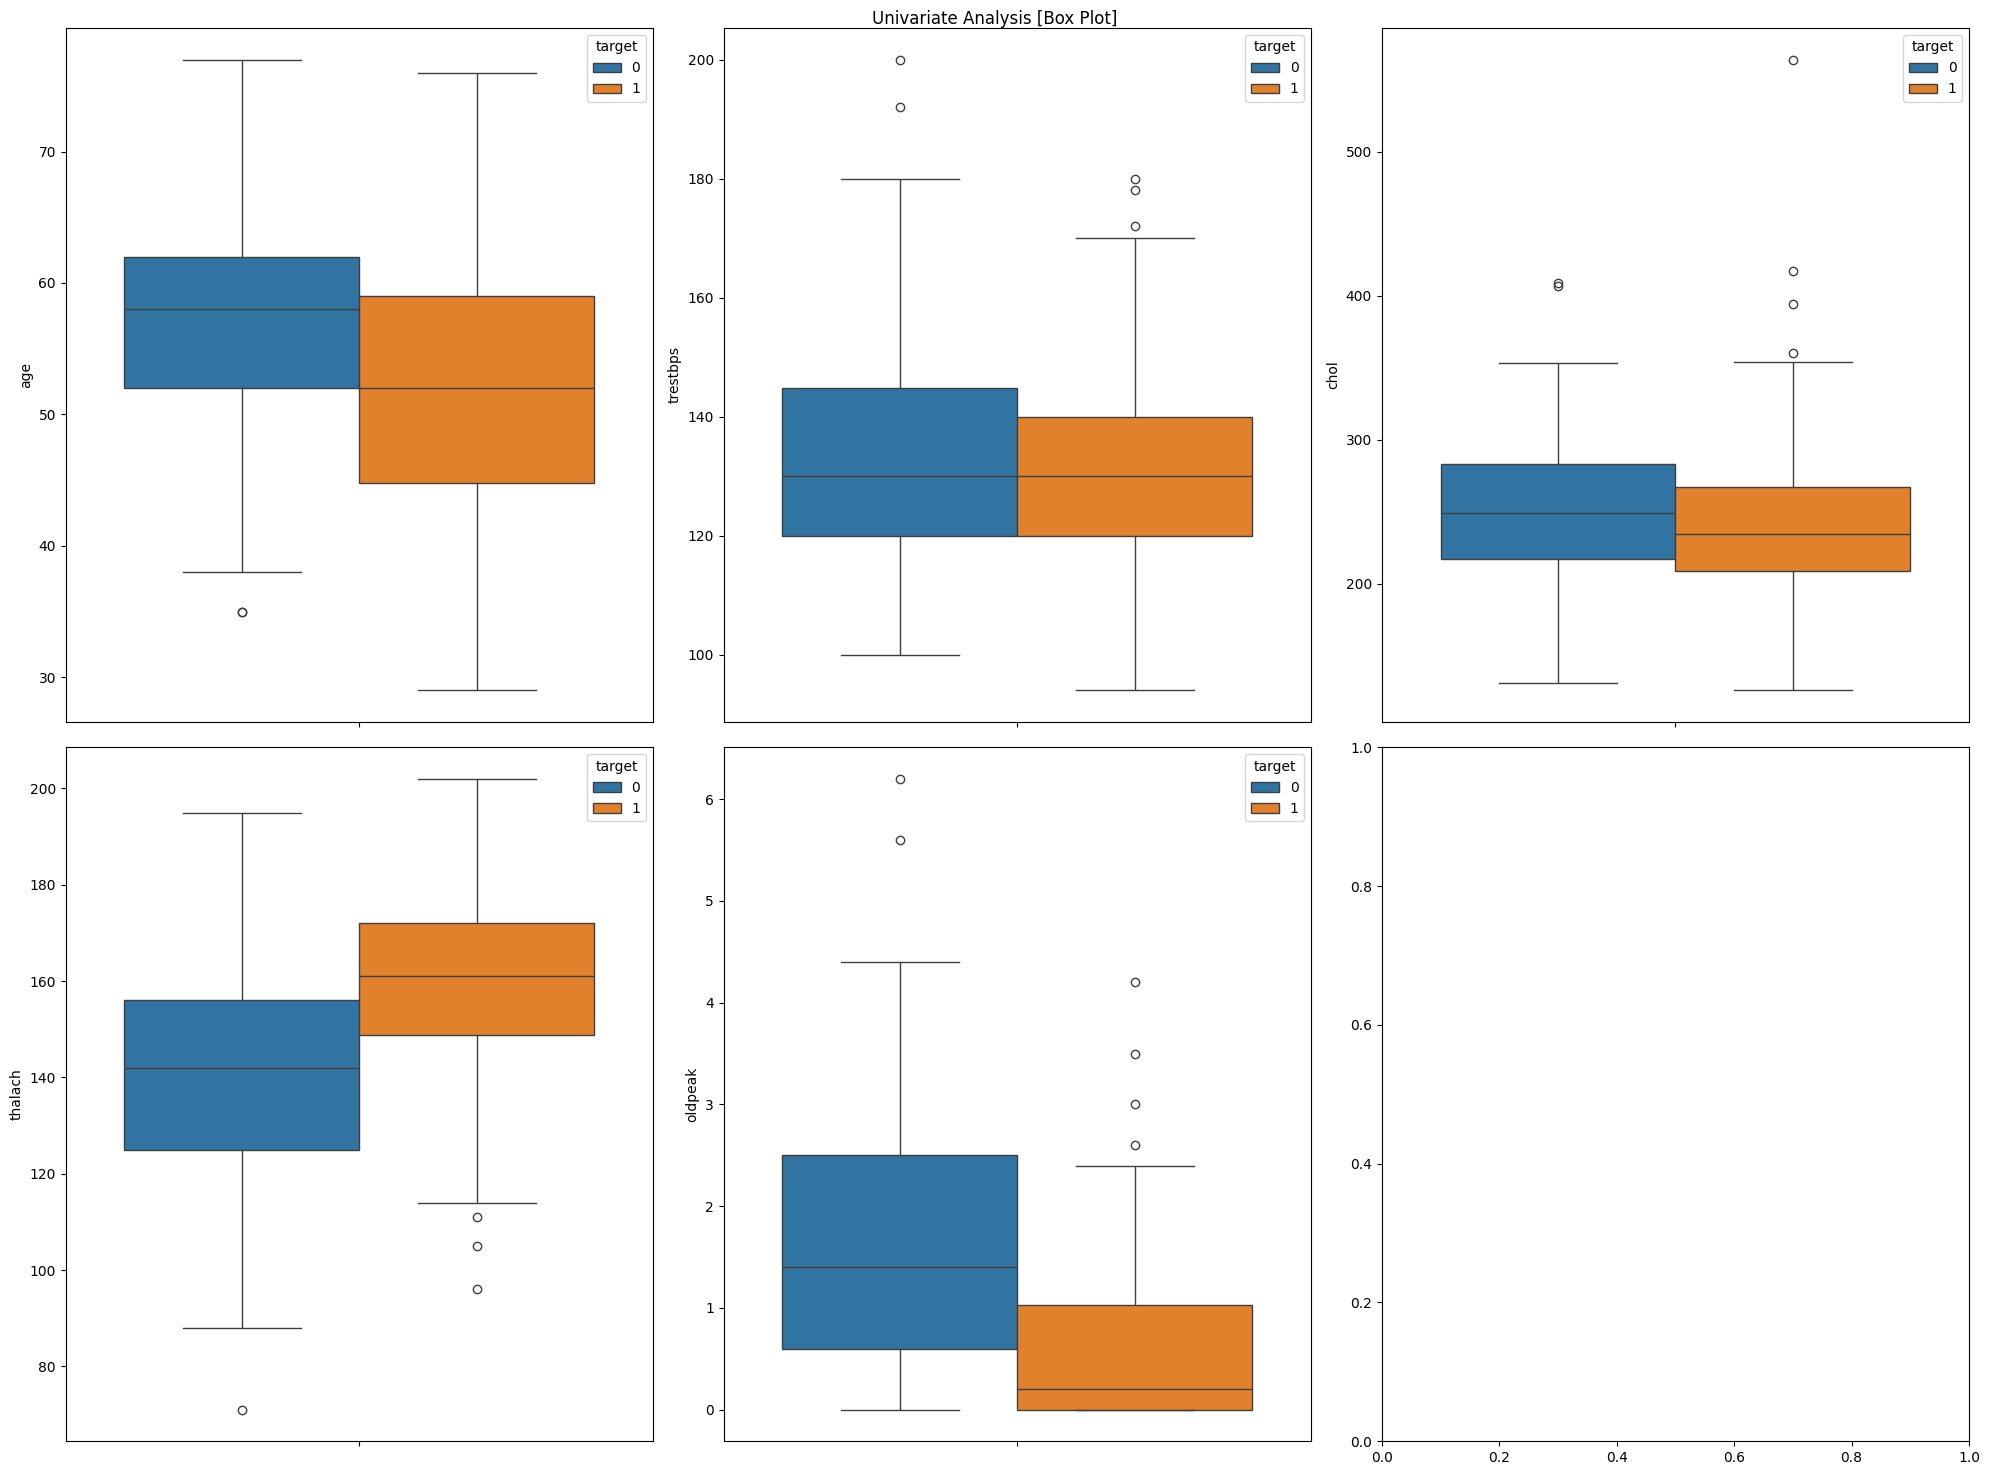

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(20,15))
i,j=0,0
for col in non_cat_col:
  if j==3:
    j=0
    i+=1
  if i==3:
    break
  sns.boxplot(data=df,y=col,ax=ax[i,j],hue="target")
  j+=1
plt.suptitle("Univariate Analysis [Box Plot]")
plt.tight_layout()
plt.show()

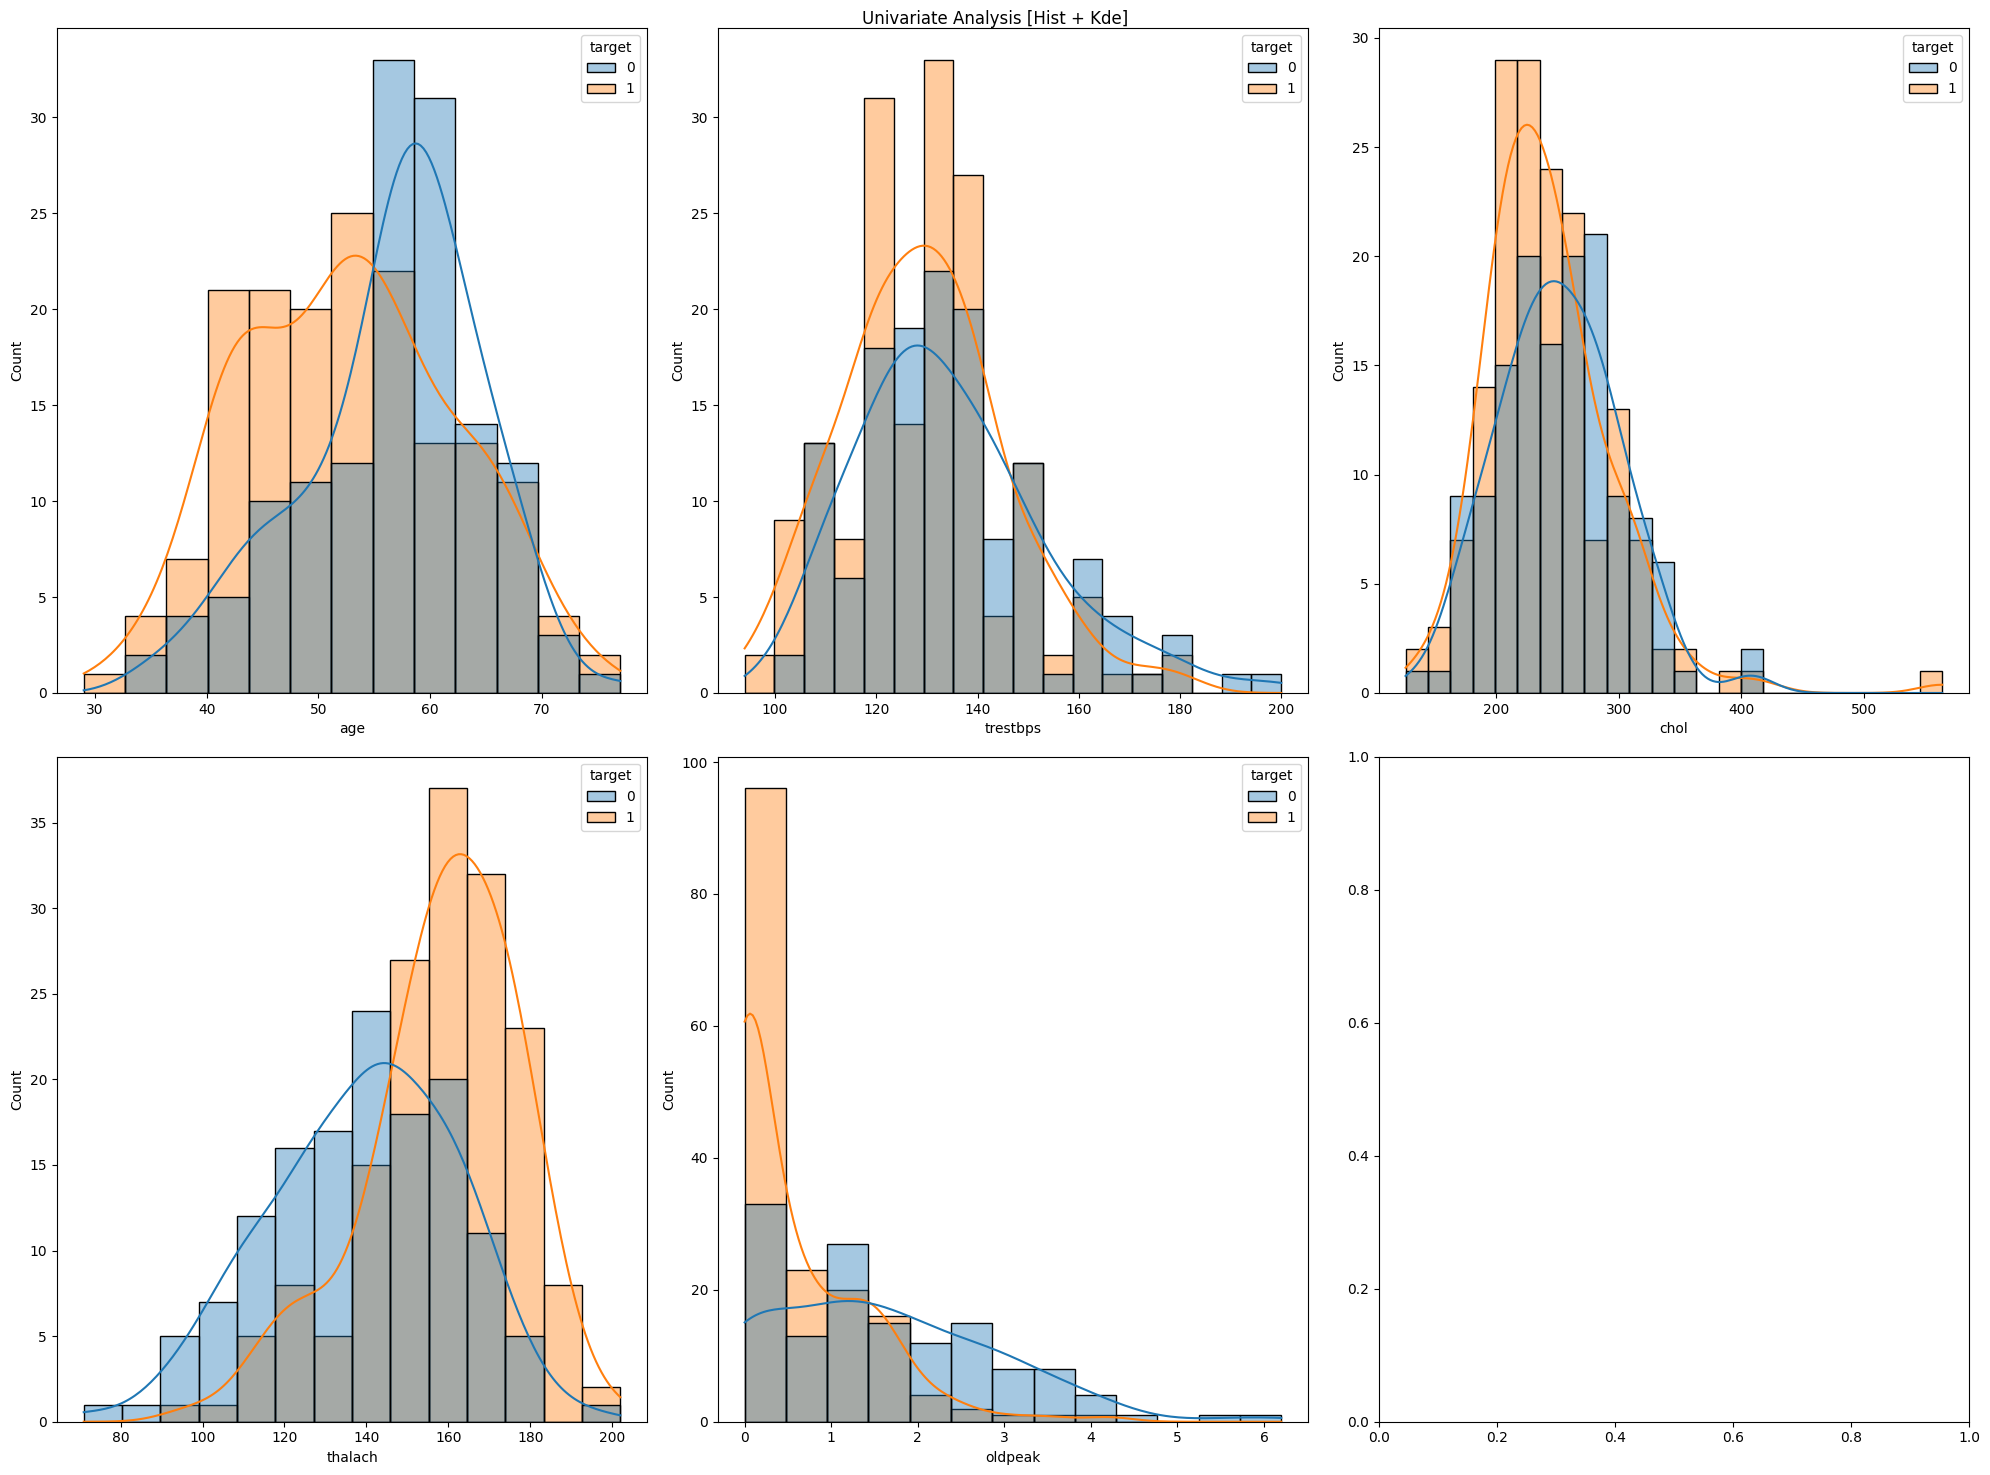

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(20,15))
i,j=0,0
for col in non_cat_col:
  if j==3:
    j=0
    i+=1
  if i==3:
    break
  sns.histplot(data=df,x=col,ax=ax[i,j],kde=True,hue="target",alpha=0.4)
  j+=1
plt.suptitle("Univariate Analysis [Hist + Kde]")
plt.tight_layout()
plt.show()

### **Data Insights**: Features: age, thalach and oldpeak are important ones.
- High thalach + low oldpeak + age (45-68) --> High heart disease probability

### Testing above hypothesis

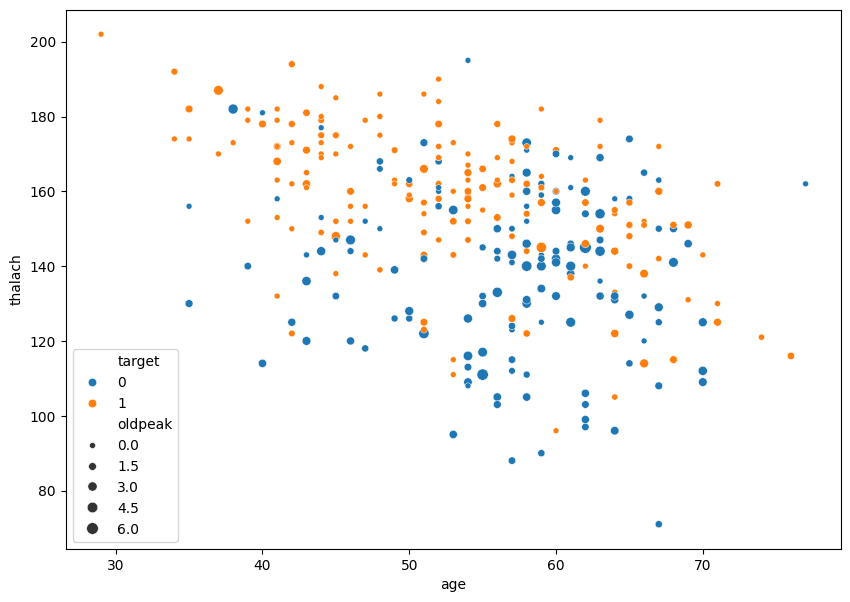

In [ ]:
fig=plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x="age",y="thalach",hue="target",size="oldpeak")
plt.show()

## Categorical Features (Imbalance check)



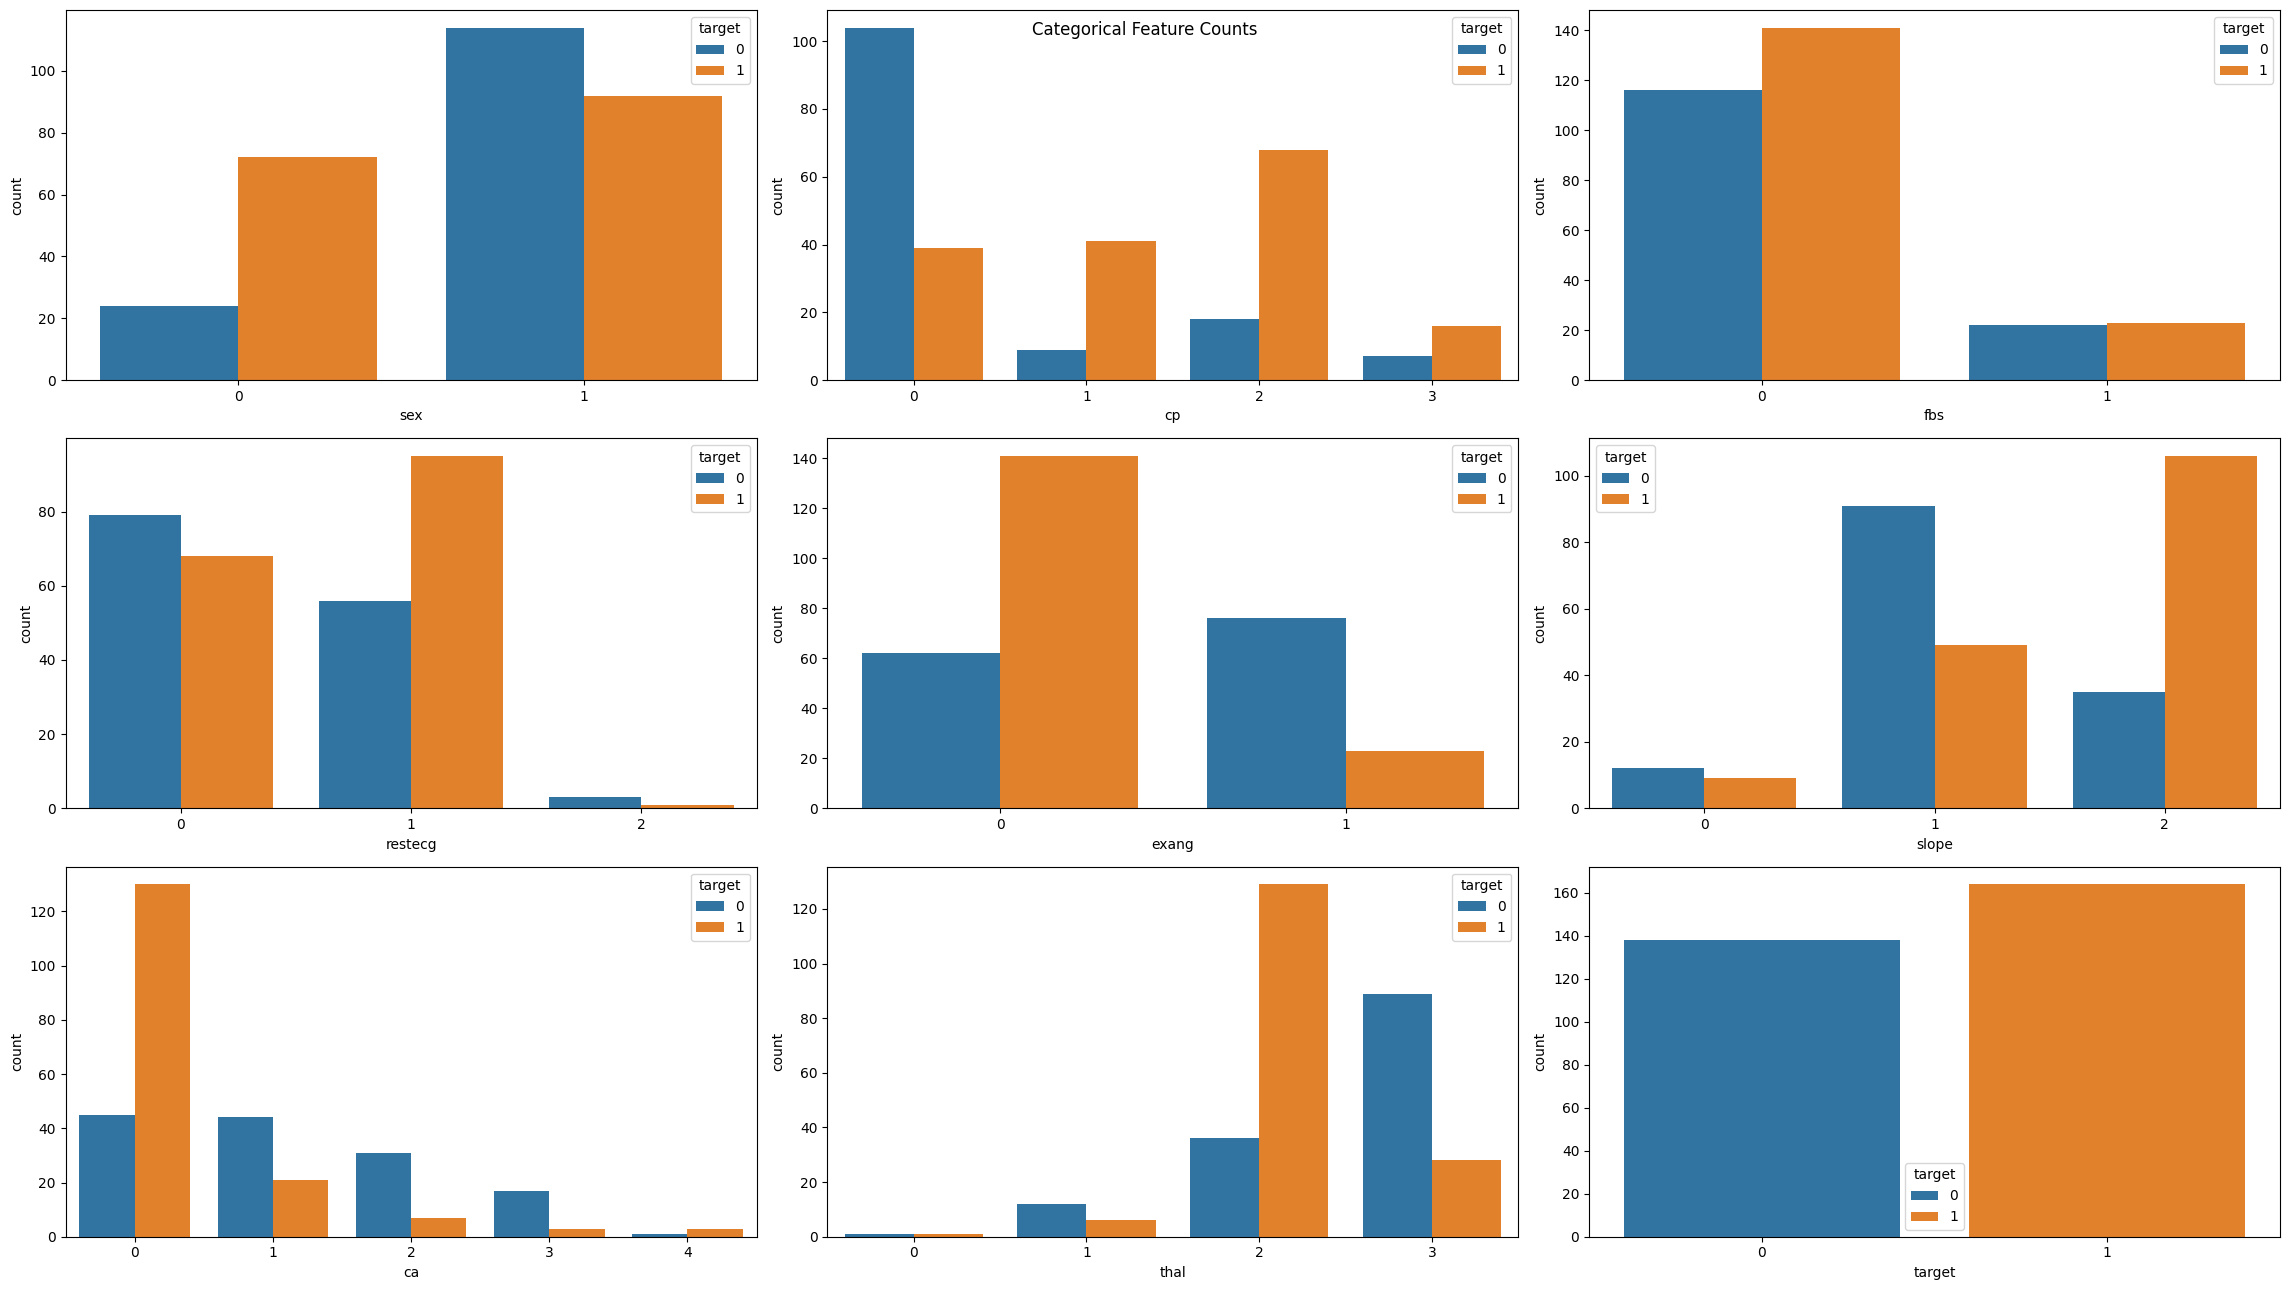

In [ ]:
fig,ax= plt.subplots(3,3,figsize=(23,13))
i,j=0,0
for col in cat_col:
  if j==3:
    j=0
    i+=1
  if i==3:
    break
  sns.countplot(data=df,x=col,hue="target",ax=ax[i,j])
  j+=1
plt.tight_layout()
plt.suptitle("Categorical Feature Counts")
plt.show()

### **Data Insight** :
 Thal (2), ca(1), slope(2), exang(0), restecg(1,0), fbs(0,1),cp(2,1,3), sex(0,1) --> High chance of heart disease [Sex feature might be having biasness for females.]

## Multi-Collinearity (Continuous features + Ordinal features + Binary Categorical Target)

<Axes: >

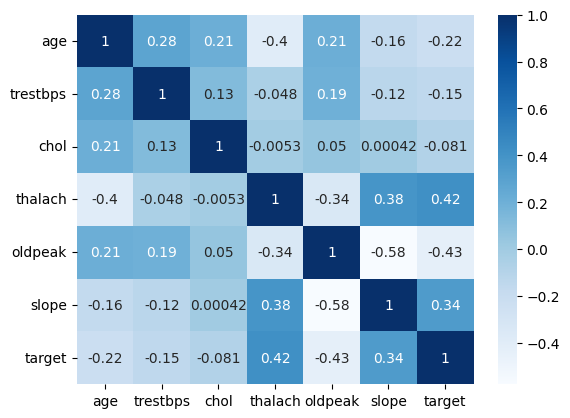

In [ ]:
sns.heatmap(df[['age', 'trestbps', 'chol',  'thalach',
        'oldpeak','slope','target']].corr(),cmap="Blues",annot=True)     ## oldpeak and slope has higher collinearity, thalach & slope a bit, thalach & age a bit

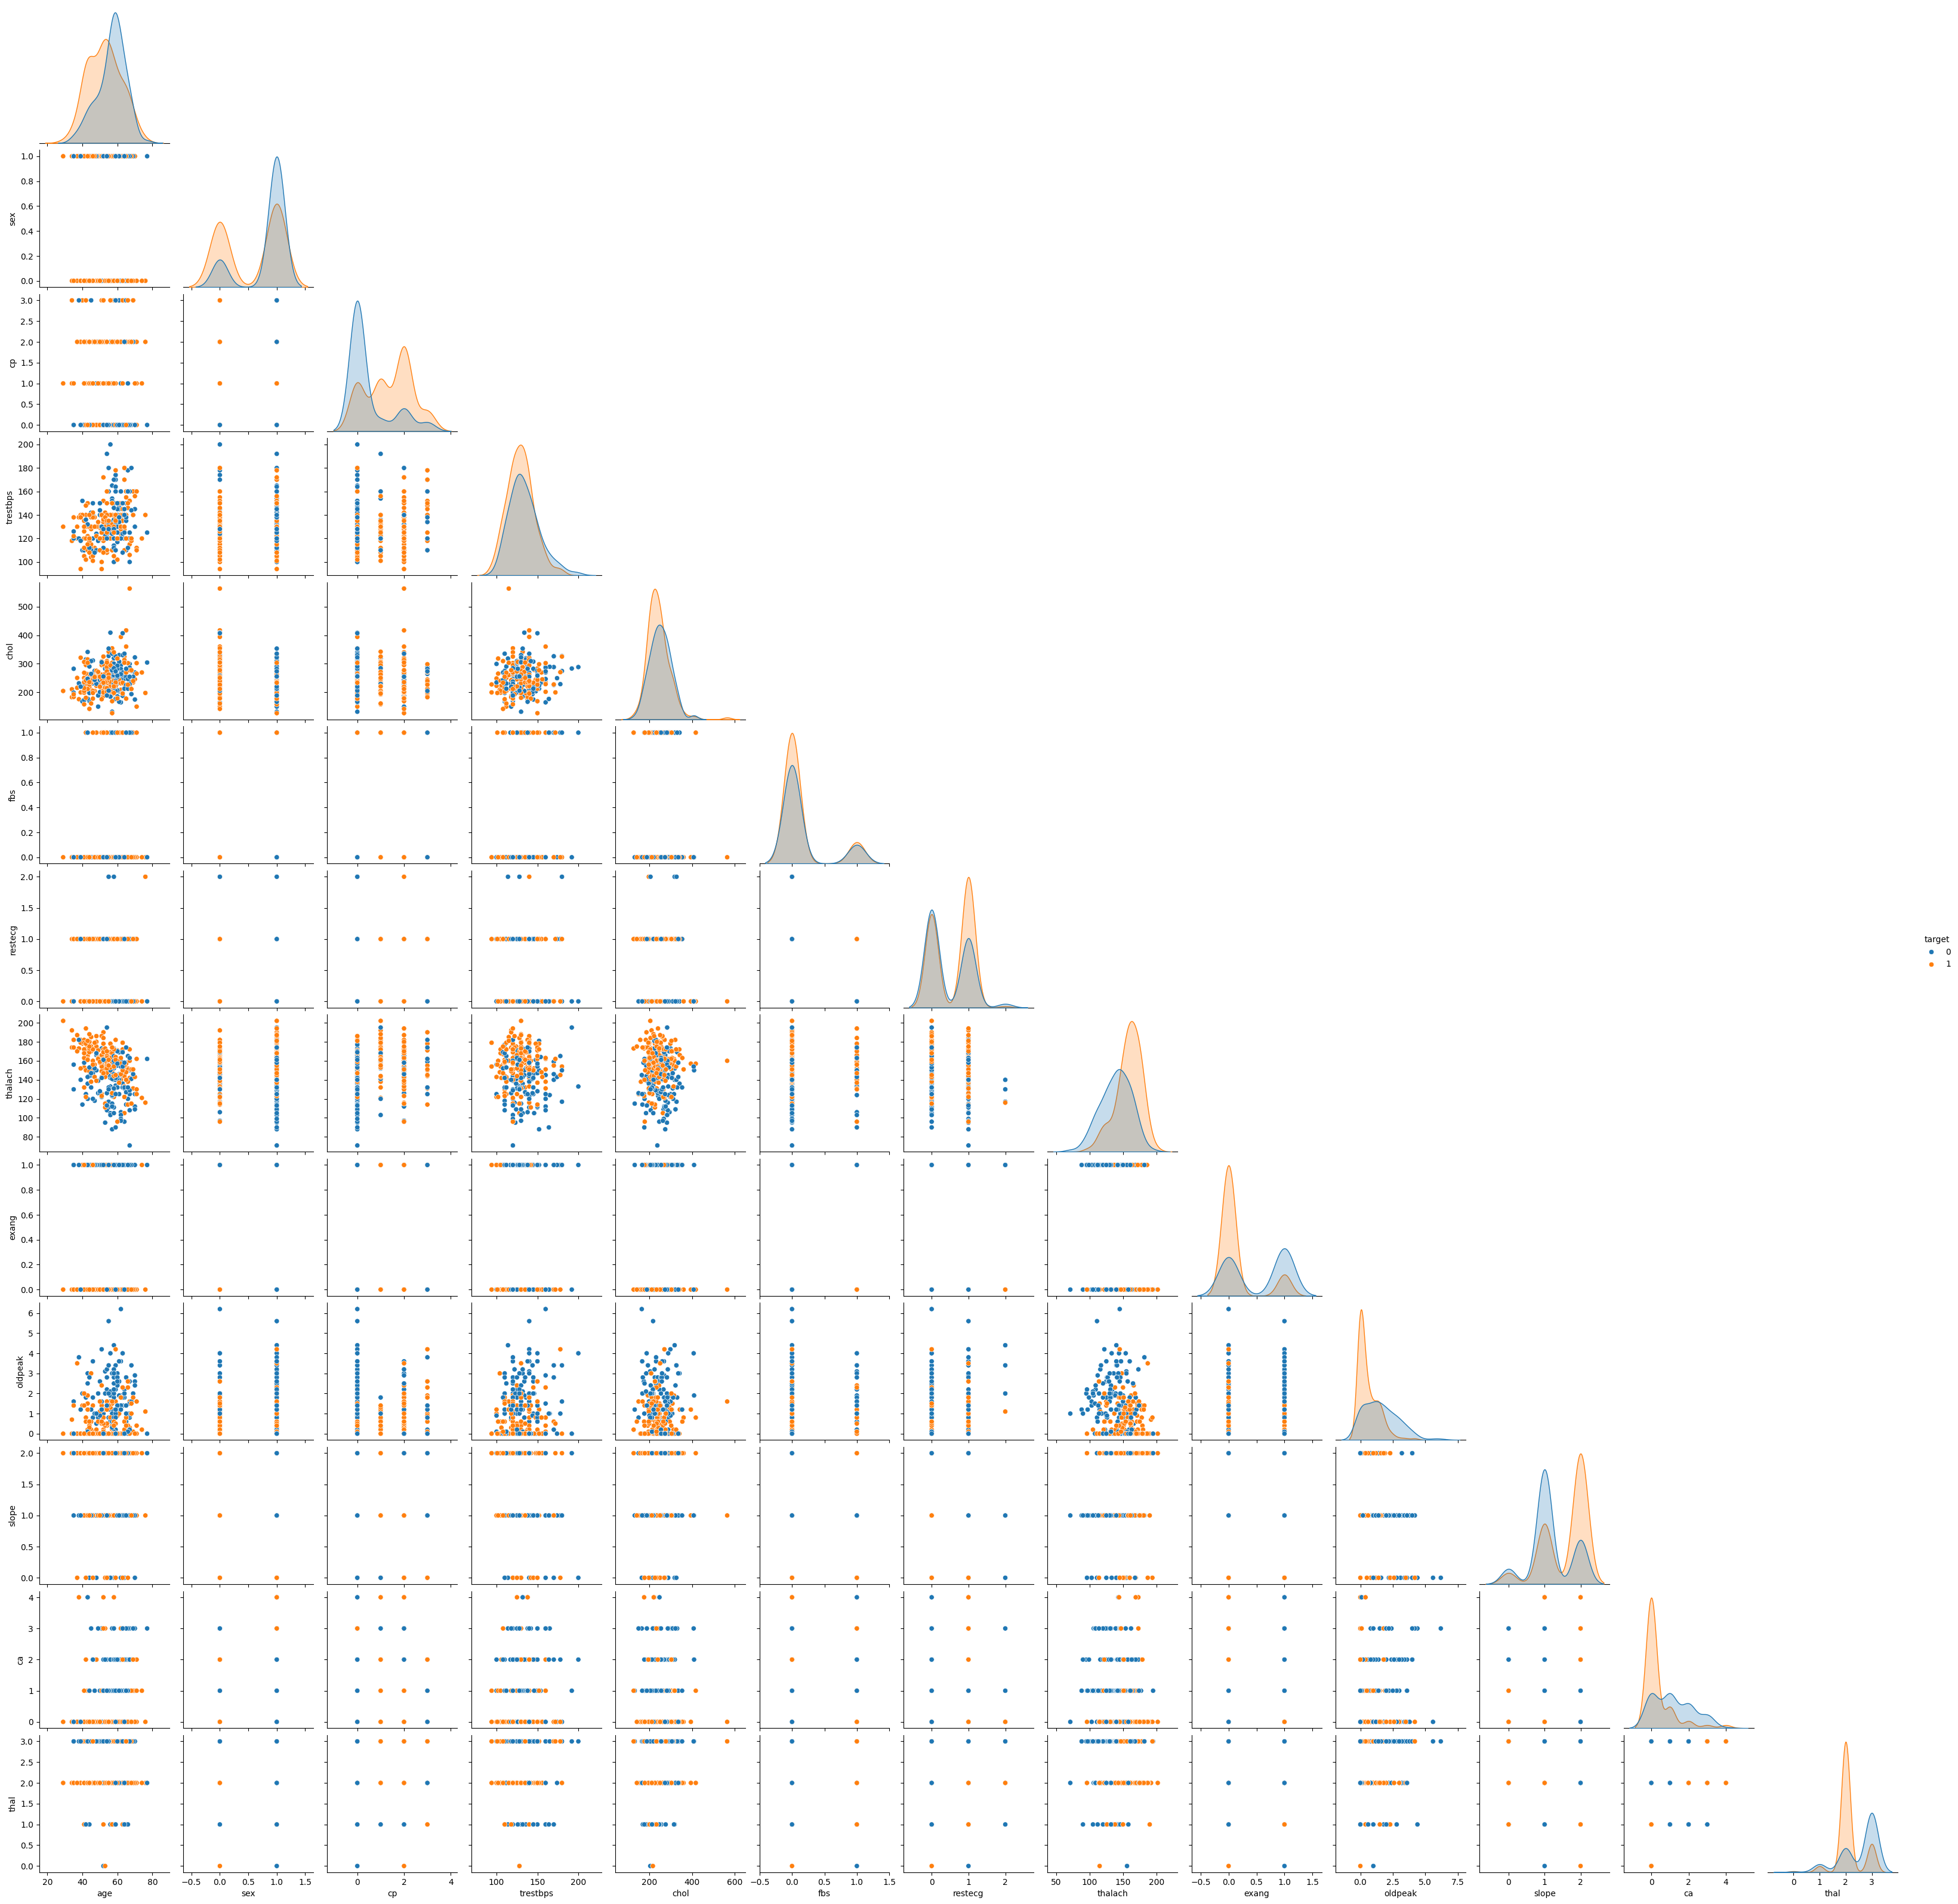

In [ ]:
sns.pairplot(df,hue="target",corner=True)

/tmp/ipython-input-2682288276.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df[col],bins=10))["target"].aggregate("mean").plot(kind="line",ax=ax[i,j])
/tmp/ipython-input-2682288276.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df[col],bins=10))["target"].aggregate("mean").plot(kind="line",ax=ax[i,j])
/tmp/ipython-input-2682288276.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

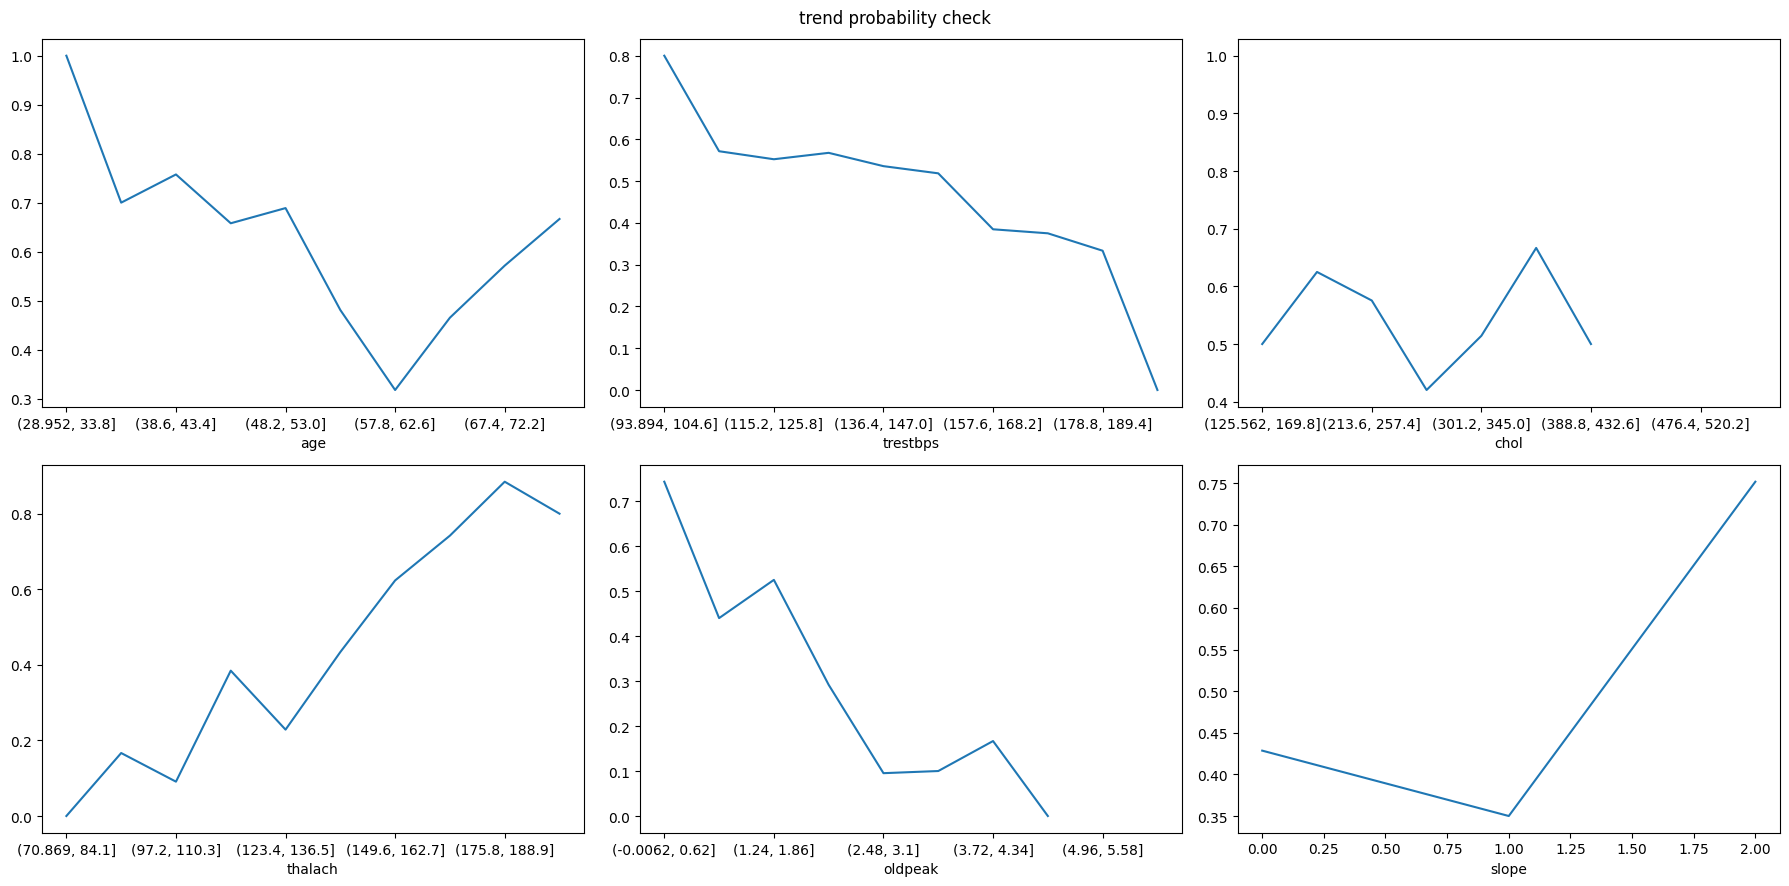

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(18,9))
i,j=0,0
for col in ['age', 'trestbps', 'chol',  'thalach','oldpeak','slope']:
  if j==3:
    j=0
    i+=1
  if i==2:
    Break
  if col=='slope':
    df.groupby(col)["target"].aggregate("mean").plot(kind="line",ax=ax[i,j])
  else:
    df.groupby(pd.cut(df[col],bins=10))["target"].aggregate("mean").plot(kind="line",ax=ax[i,j])

  j+=1
plt.suptitle("trend probability check")
plt.tight_layout()
plt.show()

## Model Assumptions based of EDA
- Thalach,age and oldpeak has Non-linear relationship --> Tree based models
- LDA might not work well --> distribution is not gaussian neither linearly separable
- Logistic might work as age,trestbps,thalach,oldpeak,slope all kind of shows trend, which in log-odds multidimensional space might be linearly separable.

- Also dataset is small, more chances of overfitting therefore, simple models seems better choice.

## Preprocessing Data

In [ ]:
X=df.drop("target",axis=1)
y=df["target"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

## Baseline Models Testing

### Best Metric to evaluate for this problem statement : **Positive Class Recall**
### Data is Balanced

In [ ]:
## Dummy classifier
df["target"].value_counts()
print("Dummy Model Accuracy:",164/(164+138))

Dummy Model Accuracy: 0.543046357615894


## Dummy Model Positive class Recall: 0.0 %

## Simple Linear Models

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train_sc,y_train)
y_pred=log_model.predict(X_test_sc)

In [ ]:
## Evaluation model
from sklearn.metrics import accuracy_score,classification_report
def eval_score(y_pred,y_test):
  print("Accuracy score:",accuracy_score(y_pred,y_test))
  print(classification_report(y_pred,y_test))
eval_score(y_pred,y_test)

Accuracy score: 0.8241758241758241
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        37
           1       0.91      0.78      0.84        54

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.84      0.82      0.83        91



###  Logistic regression Positive class Recall: 0.78 %

<Axes: >

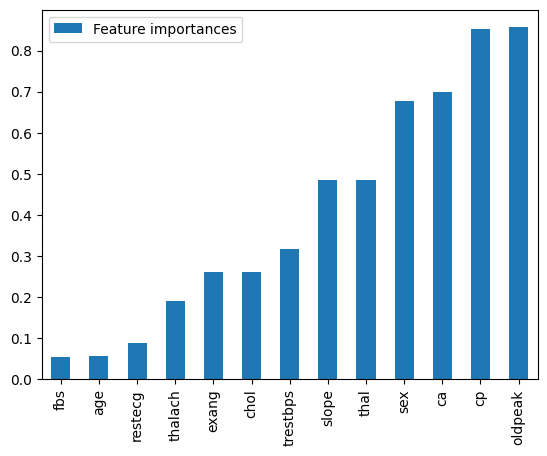

In [ ]:
pd.DataFrame(data=np.abs(log_model.coef_.reshape(-1,1)),index=X.columns,columns=["Feature importances"]).sort_values("Feature importances").plot(kind="bar")

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_train_sc,y_train)
y_pred=lda_model.predict(X_test_sc)
eval_score(y_pred,y_test)

Accuracy score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        37
           1       0.93      0.80      0.86        54

    accuracy                           0.85        91
   macro avg       0.85      0.86      0.84        91
weighted avg       0.86      0.85      0.85        91



### LDA Model Positive class Recall: 0.80 %

## Geometry based Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train_sc,y_train)
y_pred=knn_model.predict(X_test_sc)
eval_score(y_pred,y_test)

Accuracy score: 0.8241758241758241
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        37
           1       0.91      0.78      0.84        54

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.84      0.82      0.83        91



### KNN Model Positive class Recall: 0.78 %

## Trees Based Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train_sc,y_train)
y_pred=tree_model.predict(X_test_sc)
eval_score(y_pred,y_test)

Accuracy score: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        49
           1       0.67      0.74      0.70        42

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.71        91



## Decision Tree Model Positive class Recall: 0.74 %

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train_sc,y_train)
y_pred=rf_model.predict(X_test_sc)
eval_score(y_pred,y_test)

Accuracy score: 0.8241758241758241
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.87      0.80      0.83        50

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



### Random Forest Positive class Recall: 0.80 %

<Axes: >

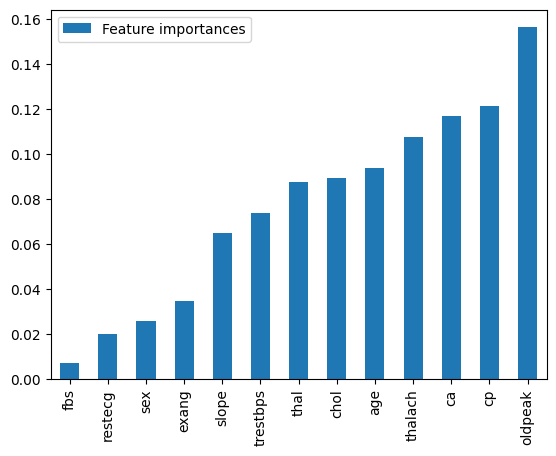

In [ ]:
pd.DataFrame(data=np.abs(rf_model.feature_importances_.reshape(-1,1)),index=X.columns,columns=["Feature importances"]).sort_values("Feature importances").plot(kind="bar")

- LDA Model Positive class Recall: 0.80 % --> Class means separated | Variances roughly similar | Gaussian distribution
- Random Forest Positive class Recall: 0.80 % --> Interaction Strenghth | Noise robustness
- Logistic regression Positive class Recall: 0.78 % --> Monotonicity | Linear boundary
- KNN Model Positive class Recall: 0.78 % --> local neighbourhood structure | Non-linear separation
- Decision Tree Model Positive class Recall: 0.74 % --> Threshold splits | Feature Interaction
- Dummy Model Positive class Recall: 0.0 %




